In [1]:
# Some imports for handling images

import base64
from io import BytesIO
from PIL import Image

import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr
import httpx
import warnings

In [2]:
warnings.filterwarnings("ignore")

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')

openai = OpenAI(http_client=httpx.Client(verify=False))

In [3]:
def artist(prompt_request):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=prompt_request,
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

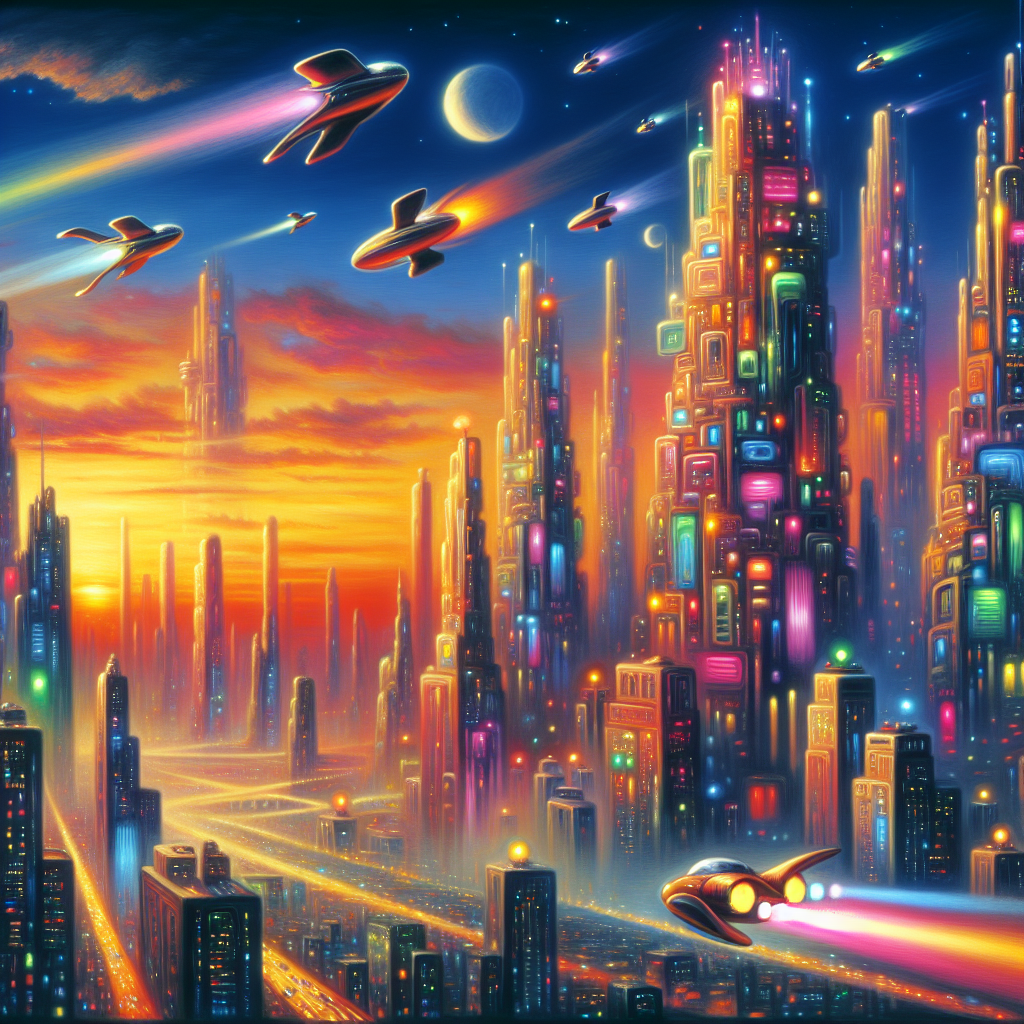

In [6]:
prompt_request = "A surreal painting of a futuristic cityscape with flying cars and neon lights"
image = artist(prompt_request)
display(image)